# Exercise #1

In [63]:
function poly_eval(a,x)
    temp = 0
    for i in 1:length(a) 
        temp += a[i]*(x^(i-1))
    end
    return temp
end

poly_eval (generic function with 1 method)

In [64]:
function horner_recursive(a,x,index)
    if(index != length(a)-1)
        return a[index]+x*horner_recursive(a,x,index+1)
    else
        return a[index]+x*a[index+1]
    end
end

function horner(a,x)
    return horner_recursive(a,x,1)
end

horner (generic function with 1 method)

In [65]:
#Test
data = rand(10)
for i in 1:10
    @assert abs(horner(data,i)-poly_eval(data,i))<1e-3
end

In [66]:
#benchmark
using BenchmarkTools
a = 1:10
x = 4

4

In [67]:
@btime poly_eval($a,$x)

  69.570 ns (0 allocations: 0 bytes)


3378745

In [68]:
@btime horner($a,$x)

  34.441 ns (0 allocations: 0 bytes)


3378745

# Exercise #2

Any[-2.2352283542830287e6, -1.1050249226616812e6, -540066.5964794446, -257873.95811498258, -117348.65898766778, -48212.030468467376, -15774.173294399996, -3016.8204777594074, -159.7701672053954, -0.49807562270507333, -4.87082070321776e-6, 0.0]
Any[2.260693715285771e6, 1.1304902836644237e6, 565531.9574821872, 283339.3191177251, 142814.0199904103, 73677.3914712099, 41239.53429714253, 28482.18148050194, 25625.131169947927, 25465.859078365236, 25465.361007613352, 25465.36100274253]


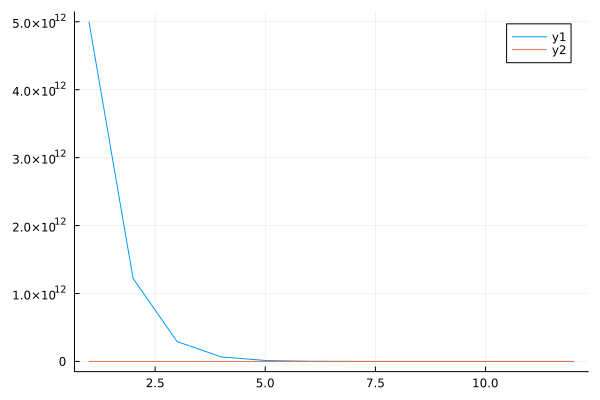

In [26]:
using Plots
function babylon(x0,y,ϵ)
    n = 0
    δarr = []
    xarr = []
    while abs(sqrt(y)-x0) > ϵ
        x0 = 0.5*(x0+(y/x0))
        δ = sqrt(y)-x0
        push!(δarr,δ)
        push!(xarr,x0)
        n+=1
    end
    println(δarr,"\n",xarr)
    return (δarr,xarr,x0,n)
end

δ,x,x0,n = babylon(4521244,648484611,1e-20)


δn = [x for x in δ[2:end]]
push!(δn,0)

plot(1:n,δn)
plot(1:n,[[x^2 for x in δ],δn])